In [108]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates

from matplotlib.ticker import MultipleLocator

pd.plotting.register_matplotlib_converters()

In [72]:
output_filepath = "sample_files/sample_output.json"

# Get all relevant information from the Scheduler Output
def get_output_data():
    filename = output_filepath
    with open(filename, "r") as openfile:
        data = json.loads(openfile.read())

    semester_id = data['semester_id']
    schedule_start = data['schedule_start']
    schedule_end = data['schedule_end']
    horizon_days = data['horizon_days']
    total_priority = data['total_priority_value']

    scheduled_reqs = []
    
    for telescope_name in data["resources"]:
        telescope_info = data["resources"][telescope_name]
        telescope_priority = telescope_info["priority_value"]
        
        print(telescope_info["dark_intervals"])
        
        # Get Dark Intervals
        dark_intervals = []
        for d in telescope_info["dark_intervals"]:
            dark_start = datetime.datetime.strptime(d["start"], "%Y-%m-%dT%H:%M:%S.%f")
            dark_end = datetime.datetime.strptime(d["end"], "%Y-%m-%dT%H:%M:%S.%f")
            dark_duration = (dark_end - dark_start).total_seconds()
        
            dark_intervals.append({
                "start": dark_start,
                "end": dark_end,
                "duration": dark_duration,
                "id": "dark",
                "telescope": telescope_name
            })

        # Get request reservations
        telescope_reservations = []
        for x in telescope_info["reservations"]:
            
            start_time = datetime.datetime.strptime(x["start"], "%Y-%m-%dT%H:%M:%S")
            end_time = datetime.datetime.strptime(x["end"], "%Y-%m-%dT%H:%M:%S")
            duration = (end_time - start_time).total_seconds()
            
            telescope_reservations.append({
                "id": x["request_id"],
                "start": start_time,
                "end": end_time,
                "duration": duration,
                "telescope": telescope_name
            })

        scheduled_reqs += telescope_reservations
        scheduled_reqs += dark_intervals

    return scheduled_reqs

In [73]:
schedule = pd.DataFrame(get_output_data())
schedule

[{'start': '2019-04-16T02:47:30.561762', 'end': '2019-04-16T10:10:29.282490'}, {'start': '2019-04-16T23:14:35.424135', 'end': '2019-04-17T10:11:02.961180'}, {'start': '2019-04-17T23:13:34.052600', 'end': '2019-04-18T10:11:36.577275'}, {'start': '2019-04-18T23:12:33.502262', 'end': '2019-04-19T10:12:10.143722'}, {'start': '2019-04-19T23:11:33.797779', 'end': '2019-04-20T10:12:43.672804'}, {'start': '2019-04-20T23:10:34.962858', 'end': '2019-04-21T10:13:17.175622'}, {'start': '2019-04-21T23:09:37.020422', 'end': '2019-04-22T10:13:50.661795'}, {'start': '2019-04-22T23:08:39.992818', 'end': '2019-04-23T02:47:30.561762'}]


,id,start,end,duration,telescope
0,103,2019-04-16 08:55:00.000000,2019-04-16 09:53:01.000000,3481.000000,4m0a.doma.sor
1,102,2019-04-16 08:30:00.000000,2019-04-16 08:52:01.000000,1321.000000,4m0a.doma.sor
2,101,2019-04-17 01:20:00.000000,2019-04-17 01:43:33.000000,1413.000000,4m0a.doma.sor
3,100,2019-04-16 23:14:35.000000,2019-04-16 23:38:08.000000,1413.000000,4m0a.doma.sor
4,99,2019-04-17 06:20:00.000000,2019-04-17 06:37:33.000000,1053.000000,4m0a.doma.sor
5,98,2019-04-17 06:40:00.000000,2019-04-17 07:03:33.000000,1413.000000,4m0a.doma.sor
6,97,2019-04-17 08:05:00.000000,2019-04-17 08:33:33.000000,1713.000000,4m0a.doma.sor
7,96,2019-04-17 07:05:00.000000,2019-04-17 07:28:33.000000,1413.000000,4m0a.doma.sor
8,95,2019-04-17 04:35:00.000000,2019-04-17 04:58:33.000000,1413.000000,4m0a.doma.sor
9,94,2019-04-17 04:10:00.000000,2019-04-17 04:33:33.000000,1413.000000,4m0a.doma.sor


In [98]:
earliest = schedule[schedule["id"]!="dark"].start.min()
latest = schedule[schedule["id"]!="dark"].end.max()
print("", earliest, "\n", latest)

 2019-04-16 03:01:44 
 2019-04-17 09:28:33


In [99]:
def get_plot_limits(earliest_start, latest_end):
    td = latest_end.date() - earliest_start.date()
    days = td.days + 1
    total_time = days * 60* 60 * 24
    plot_start = datetime.datetime.combine(earliest_start.date(), datetime.time())
    plot_end = plot_start + datetime.timedelta(days=days)
    return (plot_start, plot_end, days, total_time)

get_plot_limits(earliest, latest)

(datetime.datetime(2019, 4, 16, 0, 0),
 datetime.datetime(2019, 4, 18, 0, 0),
 2,
 172800)

In [111]:
plot_start, plot_end, days, total_time = get_plot_limits(earliest, latest)

schedule["window_delay"] = schedule.apply(lambda r: (r["start"] - plot_start).total_seconds(), axis=1)
schedule["window_length"] = schedule.apply(lambda r: (r["end"] - r["start"]).total_seconds(), axis=1)
schedule

,id,start,end,duration,telescope,window_delay,window_length
0,103,2019-04-16 08:55:00.000000,2019-04-16 09:53:01.000000,3481.000000,4m0a.doma.sor,32100.000000,3481.000000
1,102,2019-04-16 08:30:00.000000,2019-04-16 08:52:01.000000,1321.000000,4m0a.doma.sor,30600.000000,1321.000000
2,101,2019-04-17 01:20:00.000000,2019-04-17 01:43:33.000000,1413.000000,4m0a.doma.sor,91200.000000,1413.000000
3,100,2019-04-16 23:14:35.000000,2019-04-16 23:38:08.000000,1413.000000,4m0a.doma.sor,83675.000000,1413.000000
4,99,2019-04-17 06:20:00.000000,2019-04-17 06:37:33.000000,1053.000000,4m0a.doma.sor,109200.000000,1053.000000
5,98,2019-04-17 06:40:00.000000,2019-04-17 07:03:33.000000,1413.000000,4m0a.doma.sor,110400.000000,1413.000000
6,97,2019-04-17 08:05:00.000000,2019-04-17 08:33:33.000000,1713.000000,4m0a.doma.sor,115500.000000,1713.000000
7,96,2019-04-17 07:05:00.000000,2019-04-17 07:28:33.000000,1413.000000,4m0a.doma.sor,111900.000000,1413.000000
8,95,2019-04-17 04:35:00.000000,2019-04-17 04:58:33.000000,1413.000000,4m0a.doma.sor,102900.000000,1413.000000
9,94,2019-04-17 04:10:00.000000,2019-04-17 04:33:33.000000,1413.000000,4m0a.doma.sor,101400.000000,1413.000000


In [105]:
darks = schedule[schedule["id"]=="dark"]
res = schedule[schedule["id"]!="dark"]

In [118]:
darks.iloc[0]

id                                     dark
start            2019-04-16 02:47:30.561762
end              2019-04-16 10:10:29.282490
duration                       26578.720728
telescope                     4m0a.doma.sor
window_delay                   10050.561762
window_length                  26578.720728
Name: 40, dtype: object

In [119]:
lights = []
for telescope, group in darks.groupby("telescope"):
    lights.append({
        "id": "light",
        "window_delay": group.iloc[0].window_delay,
        "window_length": total_time,
        "telescope": telescope
    })
lights = pd.DataFrame(lights)
lights

,id,window_delay,window_length,telescope
0,light,10050.561762,172800,4m0a.doma.sor


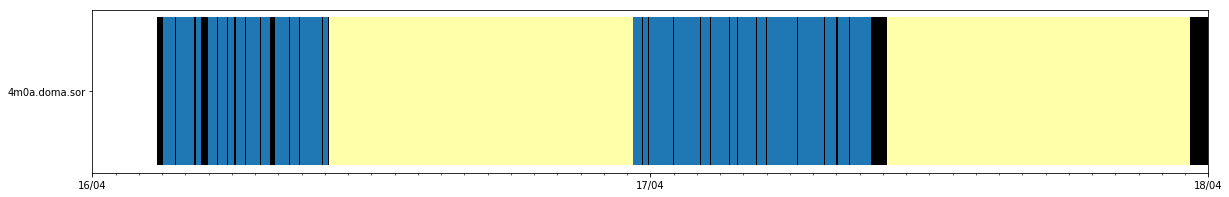

In [129]:
fig, ax = plt.subplots(1, figsize=(20, 3))

ax.barh(lights["telescope"], lights["window_length"], left=lights["window_delay"], color="#FFFFAA")
ax.barh(darks["telescope"], darks["window_length"], left=darks["window_delay"], color="#000000")
ax.barh(res["telescope"], res["window_length"], left=res["window_delay"])

# ax.barh(schedule["telescope"].astype(str), schedule["window_length"], left=schedule["window_delay"])
# ax.barh(schedule["telescope"].astype(str), schedule["duration"].astype(int), left=schedule["window_delay"])

xticks = np.arange(0, days * 60*60*24+1, 60*60*24)
# xticks_minor = np.arange(0, df2["window_length_s"].max().total_seconds(), 1)
xtick_labels = pd.date_range(plot_start, end=plot_end).strftime("%d/%m")
ax.set_xticks(xticks)
# ax.set_xticks()
ax.set_xticklabels(xtick_labels)
plt.xlim([0, total_time])
ax.xaxis.set_minor_locator(MultipleLocator(60*60))

plt.show()